<div align=center>

# Basic Example of DNN Application - Using Our Own Implementation

By Hamed Araab

Supervisor: Dr. Marzieh Zarinbal

</div>


### Notebook Setup


In [1]:
import matplotlib.pyplot as plt
import tensorflow.keras as keras

# For data loading and preprocessing
from keras.datasets import mnist
from keras.utils import to_categorical

# For model evaluation
from sklearn.metrics import confusion_matrix, f1_score, ConfusionMatrixDisplay

In [2]:
# Import the notebook containing our own implementation.
%run ./implementation.ipynb

np.set_printoptions(formatter={"float": lambda x: "{:.2f}".format(x)})

### Loading the MNIST Dataset


In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Data Preprocessing


In [4]:
X_train = X_train.reshape((60000, 784)) / 255
X_test = X_test.reshape((10000, 784)) / 255

Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000, 10), (10000, 784), (10000, 10))

### Data Visualization


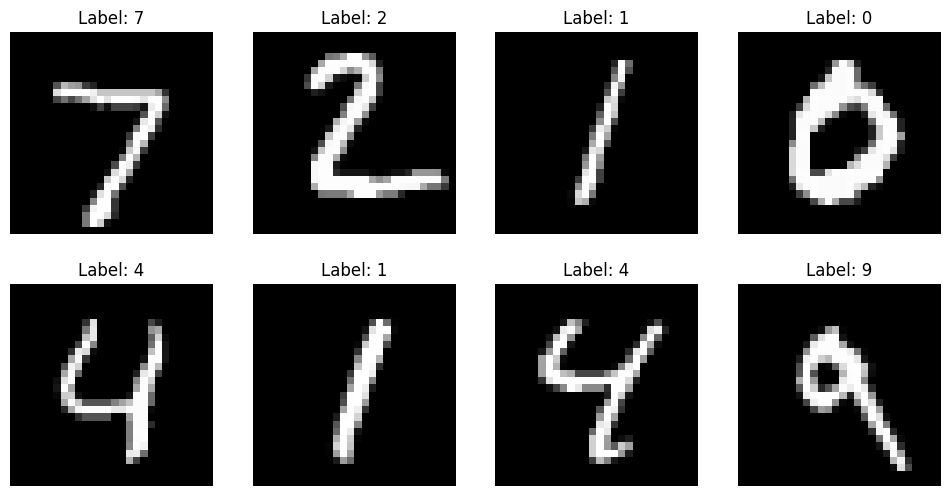

In [5]:
sample_images = X_test[:8, :]
sample_labels = Y_test[:8, :]

plt.figure(figsize=(12, 6))

for i in range(sample_images.shape[0]):
    plt.subplot(2, 4, i + 1)
    plt.imshow(sample_images[i, :].reshape((28, 28)), cmap="gray")
    plt.title(f"Label: {sample_labels[i, :].argmax()}")
    plt.axis("off")

plt.show()

### Creating & Training the DNN Model


In [6]:
np.random.seed(1)

model = NeuralNetwork(
    input_size=784,
    layers=[
        FullyConnectedLayer(units=14, activation=Sigmoid()),
        FullyConnectedLayer(units=12, activation=Sigmoid()),
        FullyConnectedLayer(units=10, activation=Softmax()),
    ],
    loss=CCELoss(),
    learning_rate=1.0,
)

model.summary()

model.train(X_train, Y_train, epochs=10, batch_size=32, test_data=(X_test, Y_test))

Trainable parameters: 11300
Epoch: 1/10, cost: 0.551, cost_test: 0.323
Epoch: 2/10, cost: 0.288, cost_test: 0.278
Epoch: 3/10, cost: 0.248, cost_test: 0.229
Epoch: 4/10, cost: 0.228, cost_test: 0.236
Epoch: 5/10, cost: 0.217, cost_test: 0.222
Epoch: 6/10, cost: 0.206, cost_test: 0.226
Epoch: 7/10, cost: 0.202, cost_test: 0.222
Epoch: 8/10, cost: 0.196, cost_test: 0.212
Epoch: 9/10, cost: 0.190, cost_test: 0.243
Epoch: 10/10, cost: 0.186, cost_test: 0.218


### Model Evaluation


train_categorical_accuracy: 0.9502833333333334
test_categorical_accuracy: 0.9372


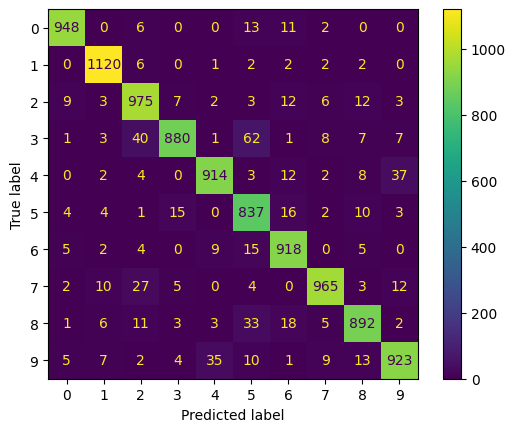

In [7]:
Y_hat_train = model.predict(X_train)
Y_hat_test = model.predict(X_test)

# The same as `CategoricalAccuracy` by TensorFlow.
print(
    "train_categorical_accuracy:",
    f1_score(
        Y_train.argmax(axis=1, keepdims=True),
        Y_hat_train.argmax(axis=1, keepdims=True),
        labels=range(10),
        average="micro",
    ),
)

print(
    "test_categorical_accuracy:",
    f1_score(
        Y_test.argmax(axis=1, keepdims=True),
        Y_hat_test.argmax(axis=1, keepdims=True),
        labels=range(10),
        average="micro",
    ),
)

ConfusionMatrixDisplay(
    confusion_matrix(
        Y_test.argmax(axis=1, keepdims=True),
        Y_hat_test.argmax(axis=1, keepdims=True),
    ),
    display_labels=range(10),
).plot()